
# Credit EDA Case Study - part II



### Business Objectives
 
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which  may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 

#### Analysis is divided into four parts for each data set provided ('previous_application.csv'):

  1. Data understanding
  2. Data cleaning
  3. Data Analysis
  4. Observations for this data set
  5. Final inferences on driving factors (or driver variables) behind loan default.
  
#### Assumptions to consider TARGET variable for this data set:

  1. We will consider **NAME_CONTRACT_STATUS** column as our TARGET variable and by using the values **"Accepted" and "Rejected"** we shall divide our data frames for furthur analysis.

In [40]:
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Anlysis on second data set.

We shall identify the attributes which impact whether or not client's previous application was approved or rejected and will use some of the inferences to finally produce combined observations among first and this data set.

In [41]:

# Read application data csv file.

df = pd.read_csv("previous_application.csv", low_memory=False)
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data understanding for application_data.csv

In [42]:
# Explore shape of data frame - approx 30k rows and 122 columns.

print(df.shape)

# Since data is too huge (1670214, 37), we shall take sample of data for our analysis - 1 lakh recrods.
df = df[:100000]

df.shape

(1670214, 37)


(100000, 37)

In [43]:
# Explore info of Data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 37 columns):
SK_ID_PREV                     100000 non-null int64
SK_ID_CURR                     100000 non-null int64
NAME_CONTRACT_TYPE             100000 non-null object
AMT_ANNUITY                    78867 non-null float64
AMT_APPLICATION                100000 non-null float64
AMT_CREDIT                     100000 non-null float64
AMT_DOWN_PAYMENT               49416 non-null float64
AMT_GOODS_PRICE                78400 non-null float64
WEEKDAY_APPR_PROCESS_START     100000 non-null object
HOUR_APPR_PROCESS_START        100000 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    100000 non-null object
NFLAG_LAST_APPL_IN_DAY         100000 non-null int64
RATE_DOWN_PAYMENT              49416 non-null float64
RATE_INTEREST_PRIMARY          341 non-null float64
RATE_INTEREST_PRIVILEGED       341 non-null float64
NAME_CASH_LOAN_PURPOSE         100000 non-null object
NAME_CONTRACT_STATUS           1

In [44]:
# Summary Statistics for each column.

df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.000000e+05,100000.000000,78867.000000,1.000000e+05,1.000000e+05,4.941600e+04,7.840000e+04,100000.000000,100000.000000,49416.000000,...,341.000000,100000.000000,1.000000e+05,78867.000000,61880.000000,61880.000000,61880.000000,61880.000000,61880.000000,61880.000000
mean,1.920045e+06,278899.772470,15433.216658,1.683262e+05,1.879402e+05,6.653837e+03,2.147331e+05,12.464500,0.996590,0.079688,...,0.784244,-902.911130,3.528960e+02,15.494148,343800.687524,14124.636991,32250.567712,76655.178539,81745.872576,0.324418
std,5.349922e+05,102847.178043,14588.069941,2.823089e+05,3.087386e+05,1.855235e+04,3.028442e+05,3.322356,0.058296,0.107818,...,0.094204,787.791457,1.273162e+04,13.984772,85983.762457,73138.950424,104734.117745,149706.964263,153151.780750,0.468161
min,1.000001e+06,100006.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.424419,-2922.000000,-1.000000e+00,0.000000,-2920.000000,-2891.000000,-2800.000000,-2888.000000,-2847.000000,0.000000
25%,1.455187e+06,189783.500000,6115.275000,2.166188e+04,2.581538e+04,0.000000e+00,4.905000e+04,10.000000,1.000000,0.000000,...,0.715645,-1346.000000,-1.000000e+00,6.000000,365243.000000,-1644.000000,-1270.000000,-1337.000000,-1296.000000,0.000000
50%,1.919599e+06,279094.500000,10852.380000,7.105500e+04,7.875000e+04,1.660950e+03,1.048342e+05,12.000000,1.000000,0.050686,...,0.835095,-602.000000,1.000000e+01,12.000000,365243.000000,-824.000000,-365.000000,-536.000000,-499.000000,0.000000
75%,2.384151e+06,368485.500000,19609.065000,1.800000e+05,1.979550e+05,7.807500e+03,2.250000e+05,15.000000,1.000000,0.108911,...,0.852537,-292.000000,1.000000e+02,18.000000,365243.000000,-405.000000,114.000000,-71.000000,-44.750000,1.000000
max,2.845377e+06,456254.000000,417927.645000,3.826372e+06,4.104351e+06,1.035000e+06,3.826372e+06,23.000000,1.000000,0.948445,...,0.867336,-2.000000,4.000000e+06,72.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [45]:
# Observe the features(columns) available and choose the improtant one's for analysis.
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## Data cleaning for application_data.csv

#### Identifying Missing Values

The methods ```isnull()``` and ```notnull()``` are the most common ways of identifying missing values. 

While handling missing data, we first need to identify the rows and columns containing missing values, count the number of missing values, and then decide how to treat them.

It is important that to **treat missing values in each column separately**, rather than implementing a single solution (e.g. replacing NaNs by the mean of a column) for all columns.

In [46]:
# summing up the missing values (column-wise)
df.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                    21133
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT               50584
AMT_GOODS_PRICE                21600
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
RATE_DOWN_PAYMENT              50584
RATE_INTEREST_PRIMARY          99659
RATE_INTEREST_PRIVILEGED       99659
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_TYPE_SUITE                48484
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
N

In [47]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     21.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                51.0
AMT_GOODS_PRICE                 22.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               51.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 48.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [48]:
# Removing the columns having at least 50% missing values.

columns_to_drop = df.columns[100*(df.isnull().sum()/len(df.index)) >= 50]
print(columns_to_drop)
print(len(columns_to_drop))

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')
4


So as seen above we have 4 of the columns having atleast 50% of the missing values. So we will drop these columns.

In [49]:
# Drop above columns from data frame.

df = df.drop(columns_to_drop, axis=1)
print(df.shape)

(100000, 33)


In [50]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [51]:
# Check % of missing values.
(df.isnull().sum()/len(df.index)) * 100

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    21.133
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                21.600
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                48.484
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    21.133
NAME_YIELD_GROUP                0.000
PRODUCT_COMB

In [52]:
# Check variables having atleast 30% of missing values.
columns = df.columns[100*(df.isnull().sum()/len(df.index)) >= 30]
print(columns)

Index(['NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In the above columns we can check how each one of them affect the TARGET variable. 
If it has minor impact on the target then it's safe to drop those variables which has around 30% missing values.

So assuming below variables are safe to drop except **'NFLAG_INSURED_ON_APPROVAL'**
'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL

In [53]:
columns_to_drop = ['NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
df = df.drop(columns_to_drop, axis=1)
print(df.shape)

(100000, 27)


In [54]:
# Check % of missing values.
(df.isnull().sum()/len(df.index)) * 100

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    21.133
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                21.600
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    21.133
NAME_YIELD_GROUP                0.000
PRODUCT_COMBINATION             0.017
NFLAG_INSURE

So by far we have reduced our missing values to ~30% column-wise, so now we will find startegies to apply imputation on missing values. 

### Treating Missing Values in Columns

Let's now treat missing values in columns. Let's look at the number of NaNs in each column again.

In [55]:
# Explore columns having missing values more thatn 5%.

print(df.shape)

print(df.columns[100*(df.isnull().sum()/len(df.index)) >= 5])

# As we can see from the results that 'NFLAG_INSURED_ON_APPROVAL' has ~38% missing values.
print(df['NFLAG_INSURED_ON_APPROVAL'].value_counts())

(100000, 27)
Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
0.0    41805
1.0    20075
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64


We shall drop **NFLAG_INSURED_ON_APPROVAL** by observing above values, If we try to impute missing values in **NFLAG_INSURED_ON_APPROVAL** with **0.0** which approximately constitutes to **~41%(41805/100000)** of the total occupations, this would still result in biased imputation having ~80% of data with **0.0**. So we shall consider to drop this column.

In [56]:
df = df.drop('NFLAG_INSURED_ON_APPROVAL', axis=1)
print(df.shape)

print(# Check % of missing values.
(df.isnull().sum()/len(df.index)) * 100)

(100000, 26)
SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    21.133
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                21.600
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    21.133
NAME_YIELD_GROUP                0.000
PRODUCT_COMBINATION             0.017

In [57]:
# Now we try to treat  - 'CNT_PAYMENT'
df['CNT_PAYMENT'].describe()

count    78867.000000
mean        15.494148
std         13.984772
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         72.000000
Name: CNT_PAYMENT, dtype: float64


A good way to estimate the 'spread of data' is to look at the difference between the mean and the median (lower the better).
Thus, let's impute the missing values by the mean value.

In [58]:
# imputing CNT_PAYMENT by mean value.
df['CNT_PAYMENT'].fillna((df['CNT_PAYMENT'].mean()), inplace=True)
df.isnull().sum()/len(df.index) * 100

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    21.133
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                21.600
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                     0.000
NAME_YIELD_GROUP                0.000
PRODUCT_COMBINATION             0.017
dtype: float

Now we shall proceed to choose our variables for the analysis.

In [59]:
# Choose required columns for analysis.
print(df.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


#### Select attributes(features - independant variables) for our analysis.

We can consider below attributes(independant variables) for our analysis on how these impact our 'TARGET' variable, Also at the end of this first set of analysis we will put our observations on how some of these variables impact the Loan contract status. This can be finally used to predict probable defaults.

TARGET variable - **NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application**

    1. NAME_CONTRACT_TYPE  - Contract product type (Cash loan, consumer loan [POS] ,...)
    2. AMT_CREDIT          - Final credit amount on the previous application.
    3. AMT_APPLICATION     - how much credit did client ask on the previous application.
    3. NAME_CLIENT_TYPE    - Was the client old or new client when applying for the previous application.
    4. NAME_PAYMENT_TYPE   - Payment method that client chose to pay for the previous application.
    5. NAME_YIELD_GROUP    - Grouped interest rate into small medium and high of the previous application
    6. AMT_ANNUITY         - Annuity of previous application

In [60]:
columns = ['SK_ID_PREV', 'NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE', 'AMT_CREDIT','AMT_APPLICATION', 
           'NAME_CLIENT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_YIELD_GROUP']
sliced_data = df[columns].copy()
sliced_data.head()

,SK_ID_PREV,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_APPLICATION,NAME_CLIENT_TYPE,NAME_PAYMENT_TYPE,NAME_YIELD_GROUP
0,2030495,Approved,Consumer loans,17145.0,17145.0,Repeater,Cash through the bank,middle
1,2802425,Approved,Cash loans,679671.0,607500.0,Repeater,XNA,low_action
2,2523466,Approved,Cash loans,136444.5,112500.0,Repeater,Cash through the bank,high
3,2819243,Approved,Cash loans,470790.0,450000.0,Repeater,Cash through the bank,middle
4,1784265,Refused,Cash loans,404055.0,337500.0,Repeater,Cash through the bank,high


### Observe data types.

In [61]:
sliced_data.dtypes

SK_ID_PREV                int64
NAME_CONTRACT_STATUS     object
NAME_CONTRACT_TYPE       object
AMT_CREDIT              float64
AMT_APPLICATION         float64
NAME_CLIENT_TYPE         object
NAME_PAYMENT_TYPE        object
NAME_YIELD_GROUP         object
dtype: object

Here we can see that we we need to update our TARGET variable **NAME_CONTRACT_TYPE** so that it will help us for anlysis.

In [62]:
sliced_data['NAME_CONTRACT_STATUS'] = sliced_data['NAME_CONTRACT_STATUS'].apply(lambda x: pd.to_numeric(1 if x == 'Approved' else 0))
sliced_data.head()

,SK_ID_PREV,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_APPLICATION,NAME_CLIENT_TYPE,NAME_PAYMENT_TYPE,NAME_YIELD_GROUP
0,2030495,1,Consumer loans,17145.0,17145.0,Repeater,Cash through the bank,middle
1,2802425,1,Cash loans,679671.0,607500.0,Repeater,XNA,low_action
2,2523466,1,Cash loans,136444.5,112500.0,Repeater,Cash through the bank,high
3,2819243,1,Cash loans,470790.0,450000.0,Repeater,Cash through the bank,middle
4,1784265,0,Cash loans,404055.0,337500.0,Repeater,Cash through the bank,high


### Check for outliers.


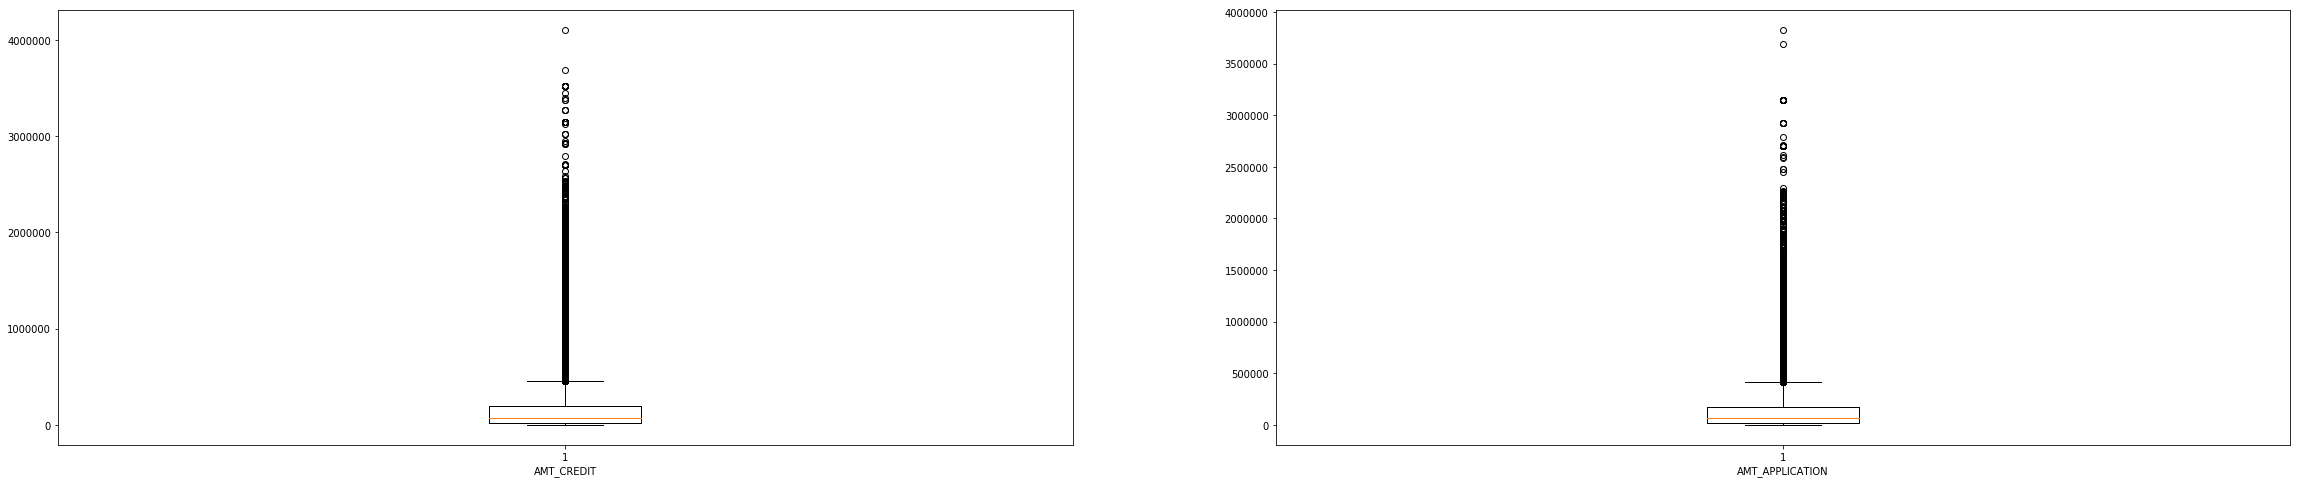

In [63]:
numeric_columns = ['int64', 'float64']
numeric_df = sliced_data.select_dtypes(include=numeric_columns)
numeric_df = numeric_df.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis = 1)

fig, axes = plt.subplots(1,2,figsize=(40,8))
for index, column in enumerate(numeric_df.columns):
    ax = axes.flatten()[index]
    ax.boxplot(numeric_df[column])
    ax.set_xlabel(column)

### Outlier detection and treatment.

#### Detection:

Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot. Some of the thumb rules to detect outliers are:

1. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
2. Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
3. Data points, three or more standard deviation away from mean are considered outlier

#### Treatment:

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

some of the common techniques used to deal with outliers:

1. Deleting observations: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Transforming and binning values: Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.


From the above box plots we can say that below attributes are affected with outliers, 

1. **AMT_CREDIT**
2. **AMT_APPLICATION** 

these outliers can be treated from one of the suitable steps mentioned above, such as either we can delete extreme values or Natural log of a value reduces the variation caused by extreme values.

Treatment approach for below attributes,

    1. AMT_CREDIT       - Apply natural log scale for values which can reduce variation.
    2. AMT_APPLICATION  - Apply natural log scale for values which can reduce variation.


## Data Analysis for previous_application.csv

We will now start our data analysis on the final data frame we have prepared with selected attributes.

### Check the imbalance percentage:

In [64]:
# Use value counts by passing normalize as TRUE to get the relative frequencies of the unique values.
print(sliced_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100)

imbalance_percentage = round(63.997/36.003, 2)
imbalance_percentage

1    63.997
0    36.003
Name: NAME_CONTRACT_STATUS, dtype: float64


1.78

From the above data we can say that the imbalance percentage is coming to around 1.780%. which inturn indicates that client with loan approval rate is 1.78 times more likely compared to other loan status. 

~67% of the clients have no difficulties in getting loan approved.

### Divide the data in to two sets (TARGET variable with 0 and 1):

In [65]:
# Divide data frame based on TARGET.

groupby_df = dict(tuple(sliced_data.groupby('NAME_CONTRACT_STATUS')))
df_0 = groupby_df[0]
df_1 = groupby_df[1]

### Univariate analysis for categorical variables.

Selected categorical variables for our analysis,

1. **NAME_CONTRACT_TYPE**
2. **NAME_PAYMENT_TYPE**
3. **NAME_YIELD_GROUP**

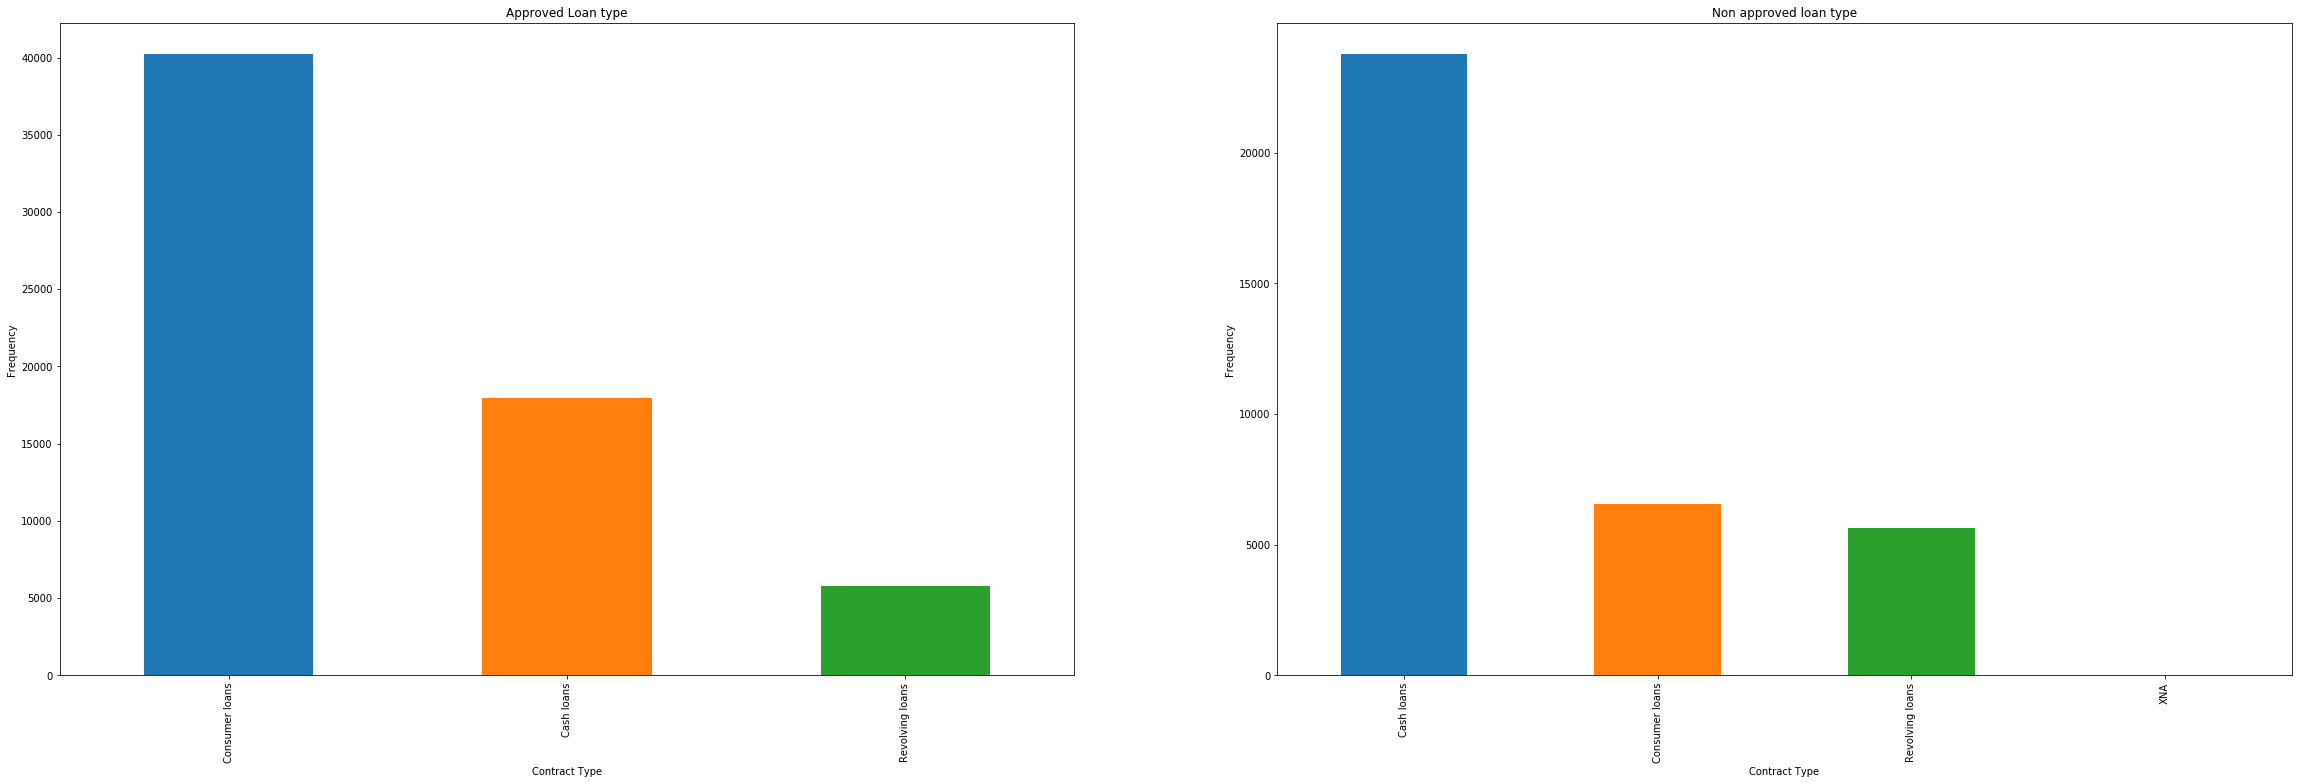

In [66]:

# NAME_CONTRACT_TYPE analysis for TARGET 0 and 1
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_title(title)
    
plot_categorical(0, 'NAME_CONTRACT_TYPE', df_1, 'Approved Loan type', 'Contract Type', 'Frequency')
plot_categorical(1, 'NAME_CONTRACT_TYPE', df_0, 'Non approved loan type', 'Contract Type', 'Frequency')


### Inferences for loan contract type:

It can observed from the above plots that for both the categories of our target variable 
**Cash loans** and **Consumer loans** tend to have higher contribution than **Revolving loans**.

Observation for **Approved loan types**

clients have more approved loans for cash loans and consumer loans compared to Revolving loan type.


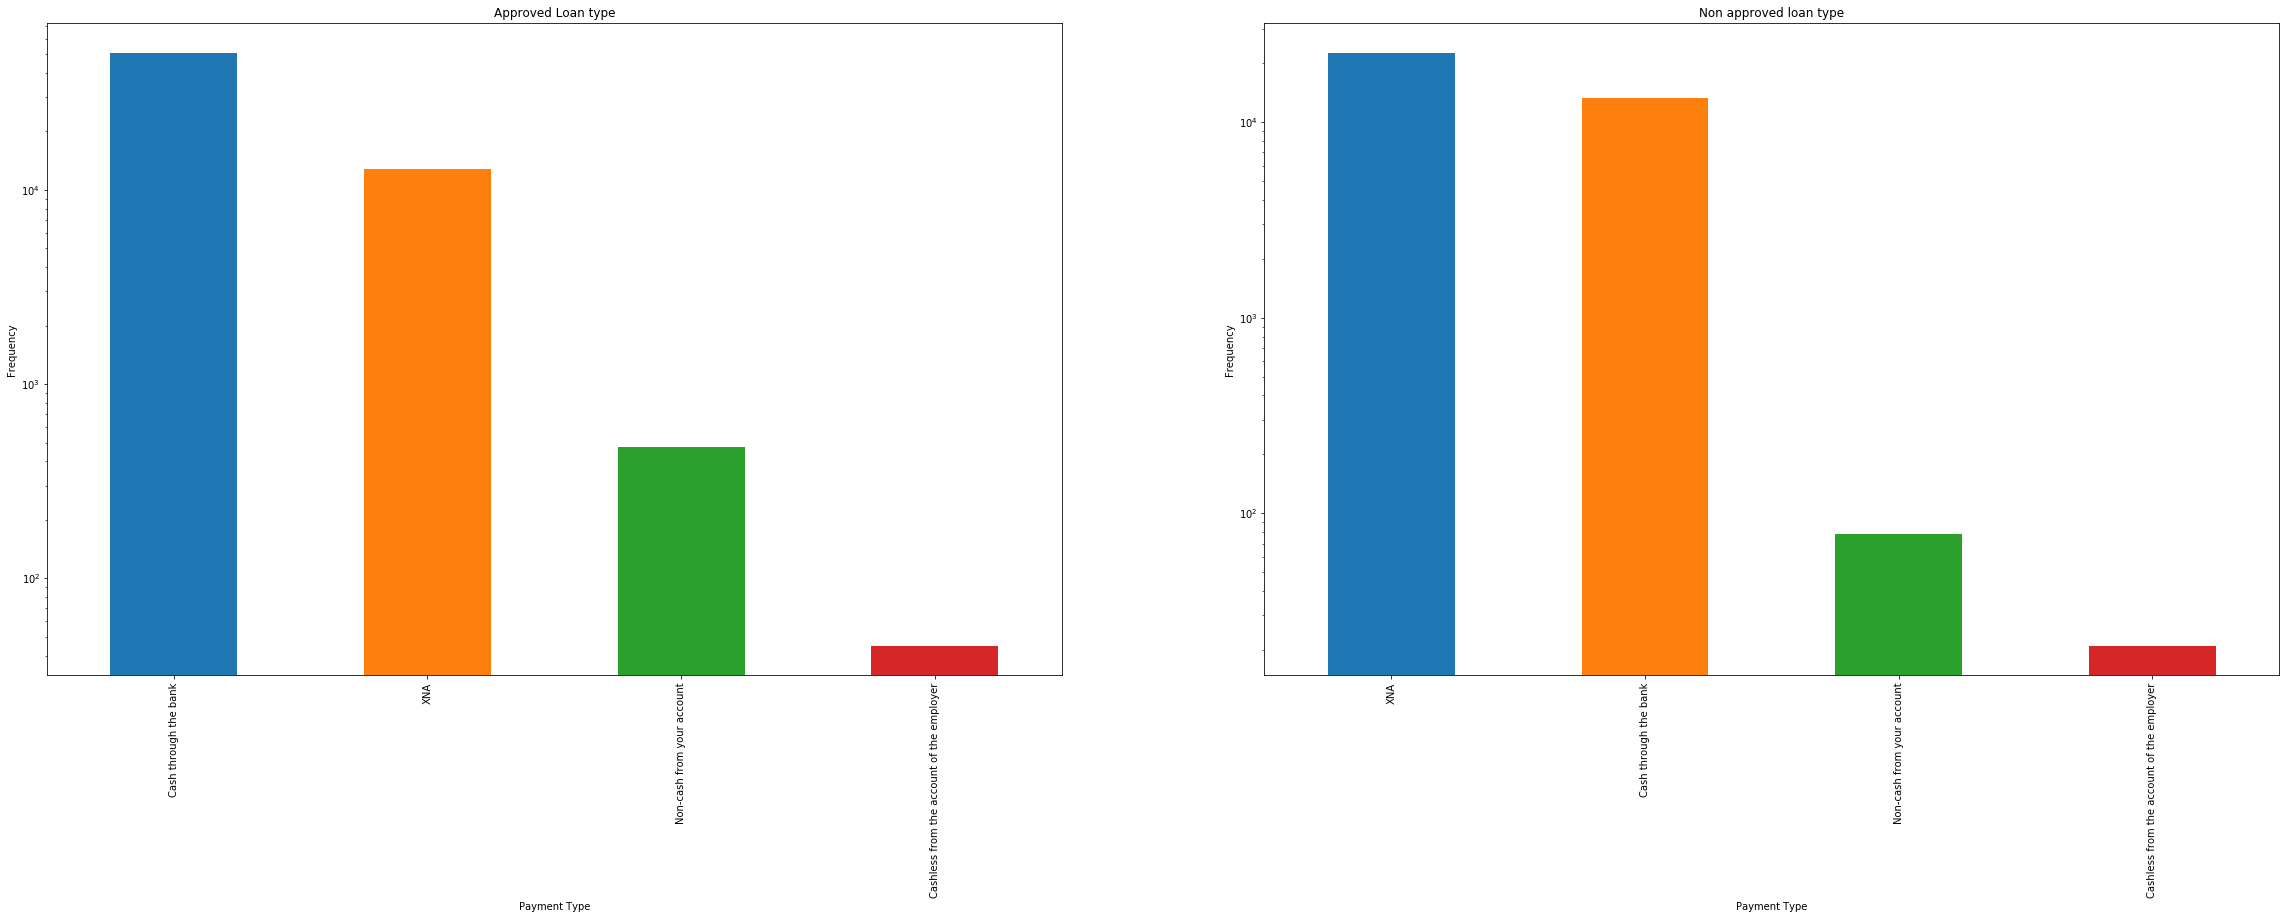

In [67]:

# NAME_PAYMENT_TYPE analysis for Target variable.
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    

plot_categorical(0, 'NAME_PAYMENT_TYPE', df_1, 'Approved Loan type', 'Payment Type', 'Frequency')
plot_categorical(1, 'NAME_PAYMENT_TYPE', df_0, 'Non approved loan type', 'Payment Type', 'Frequency')

### Inferences for payment type:

It can observed from the above plots that for both the categories of our target variable 
**Cash through the banks**, **XNA** and **Non-cash from your account** tend to have higher contribution than **Cashless from the account of the employer**.

Observation for **Approved loan types**

clients have more approved loans for **Cash through the banks**, **XNA** and **Non-cash from your account**.

Observation for **Non approved loan types**

clients have more **rejected/Cancelled** loans for **XNA** and **Non-cash from your account**.

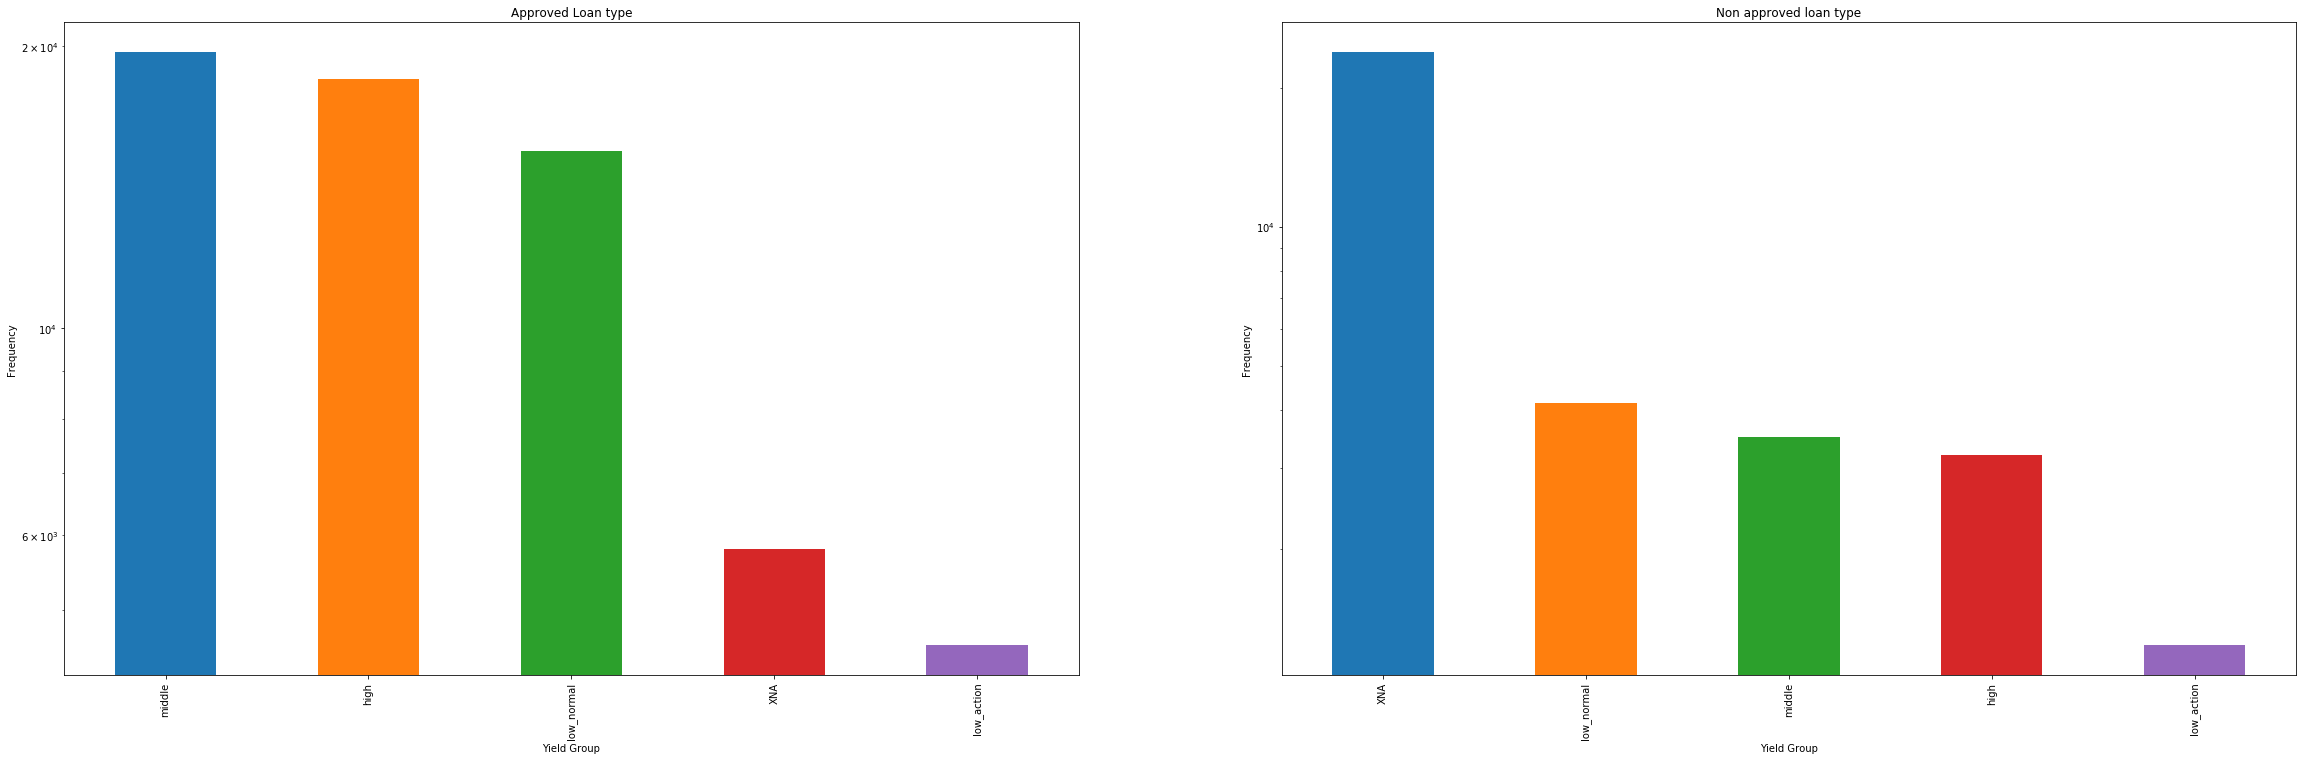

In [68]:
# NAME_YIELD_GROUP analysis for TARGET 0 and 1
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    
plot_categorical(0, 'NAME_YIELD_GROUP', df_1, 'Approved Loan type', 'Yield Group', 'Frequency')
plot_categorical(1, 'NAME_YIELD_GROUP', df_0, 'Non approved loan type', 'Yield Group', 'Frequency')

### Inferences for Name yield group:

Observation for **Approved loan types**

clients have more percentage of approved loans for **Middle**, **High** and **low_normal**.

Observation for **Non approved loan types**

clients have more **rejected/Cancelled** loans for **XNA** and **low_normal**.

### Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable)

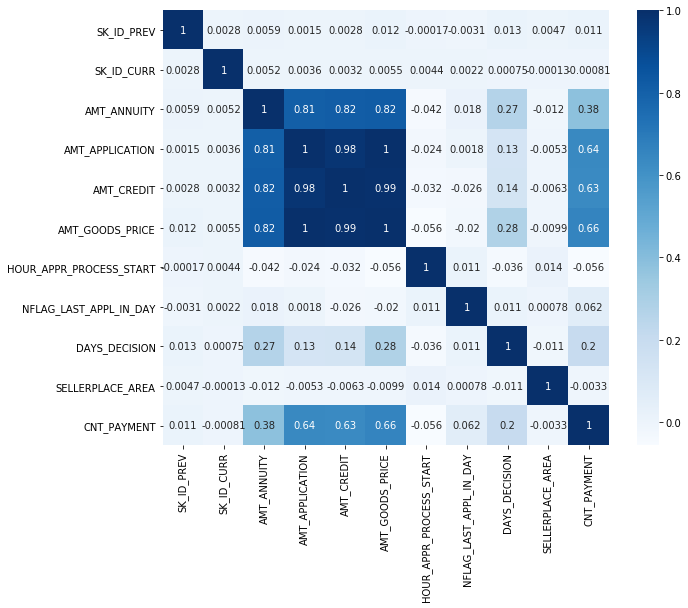

In [69]:
cor_matrix_df = df.corr()

# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor_matrix_df, cmap="Blues", annot=True)
plt.show()

In [70]:
# Top 10 correlated attributes.

sol = (cor_matrix_df.where(np.triu(np.ones(cor_matrix_df.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:10]

AMT_APPLICATION  AMT_GOODS_PRICE    0.999862
AMT_CREDIT       AMT_GOODS_PRICE    0.993513
AMT_APPLICATION  AMT_CREDIT         0.976185
AMT_ANNUITY      AMT_GOODS_PRICE    0.821803
                 AMT_CREDIT         0.815988
                 AMT_APPLICATION    0.809942
AMT_GOODS_PRICE  CNT_PAYMENT        0.659484
AMT_APPLICATION  CNT_PAYMENT        0.639096
AMT_CREDIT       CNT_PAYMENT        0.633221
AMT_ANNUITY      CNT_PAYMENT        0.383979
dtype: float64

### Top 10 correlated variables:

    1.  AMT_APPLICATION  AMT_GOODS_PRICE    0.999862
    2.  AMT_CREDIT       AMT_GOODS_PRICE    0.993513
    3.  AMT_APPLICATION  AMT_CREDIT         0.976185
    4.  AMT_ANNUITY      AMT_GOODS_PRICE    0.821803
    5.  AMT_ANNUITY      AMT_CREDIT         0.815988
    6.  AMT_ANNUITY      AMT_APPLICATION    0.809942
    7.  AMT_GOODS_PRICE  CNT_PAYMENT        0.659484
    8.  AMT_APPLICATION  CNT_PAYMENT        0.639096
    9.  AMT_CREDIT       CNT_PAYMENT        0.633221
    10. AMT_ANNUITY      CNT_PAYMENT        0.383979


So from the above data we can see **AMT_APPLICATION** and **AMT_GOODS_PRICE** is highly correlated.
which is followed by **AMT_CREDIT** and **AMT_GOODS_PRICE** and so on as shown in above list.

### Find Correlation  for selected numeric variables.

In [71]:
numeric_columns = ['int64', 'float64']
numeric_df_0 = df_0.select_dtypes(include=numeric_columns)

# Find correlation.
corr_matrix_0 = numeric_df_0.corr()
corr_matrix_0

,SK_ID_PREV,NAME_CONTRACT_STATUS,AMT_CREDIT,AMT_APPLICATION
SK_ID_PREV,1.000000,NaN,0.005490,0.004739
NAME_CONTRACT_STATUS,NaN,NaN,NaN,NaN
AMT_CREDIT,0.005490,NaN,1.000000,0.987714
AMT_APPLICATION,0.004739,NaN,0.987714,1.000000


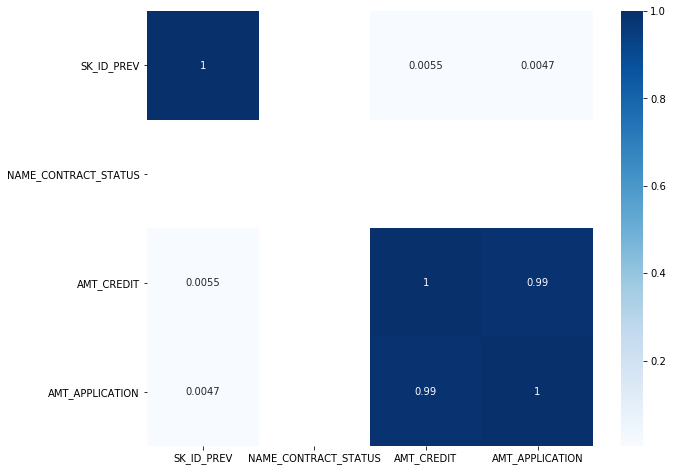

In [72]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr_matrix_0, cmap="Blues", annot=True)
plt.show()

In [73]:
numeric_columns = ['int64', 'float64']
numeric_df_1 = df_1.select_dtypes(include=numeric_columns)

# Find correlation.
corr_matrix_1 = numeric_df_1.corr()
corr_matrix_1

,SK_ID_PREV,NAME_CONTRACT_STATUS,AMT_CREDIT,AMT_APPLICATION
SK_ID_PREV,1.000000,NaN,0.003076,0.001429
NAME_CONTRACT_STATUS,NaN,NaN,NaN,NaN
AMT_CREDIT,0.003076,NaN,1.000000,0.963856
AMT_APPLICATION,0.001429,NaN,0.963856,1.000000


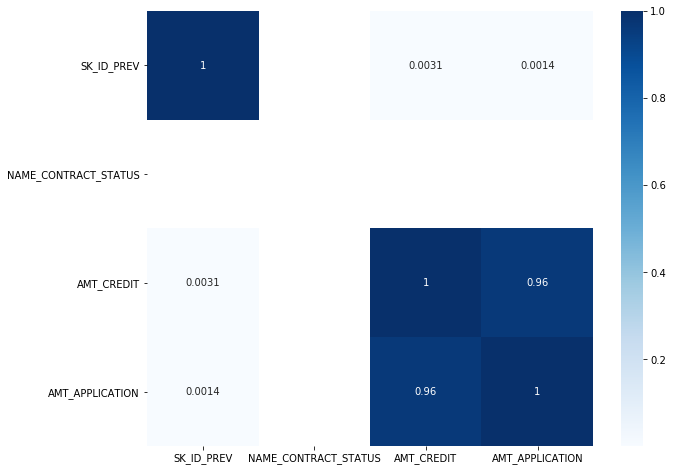

In [74]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr_matrix_1, cmap="Blues", annot=True)
plt.show()

### Inferences from above data for approved Loan case:

* AMT_CREDIT and AMT_APPLICATION are the variables with highest correlation with 0.96.

### Univariate analysis for Numerical variables.

Selected categorical variables for our analysis,

1. **AMT_APPLICATION**
2. **AMT_CREDIT**

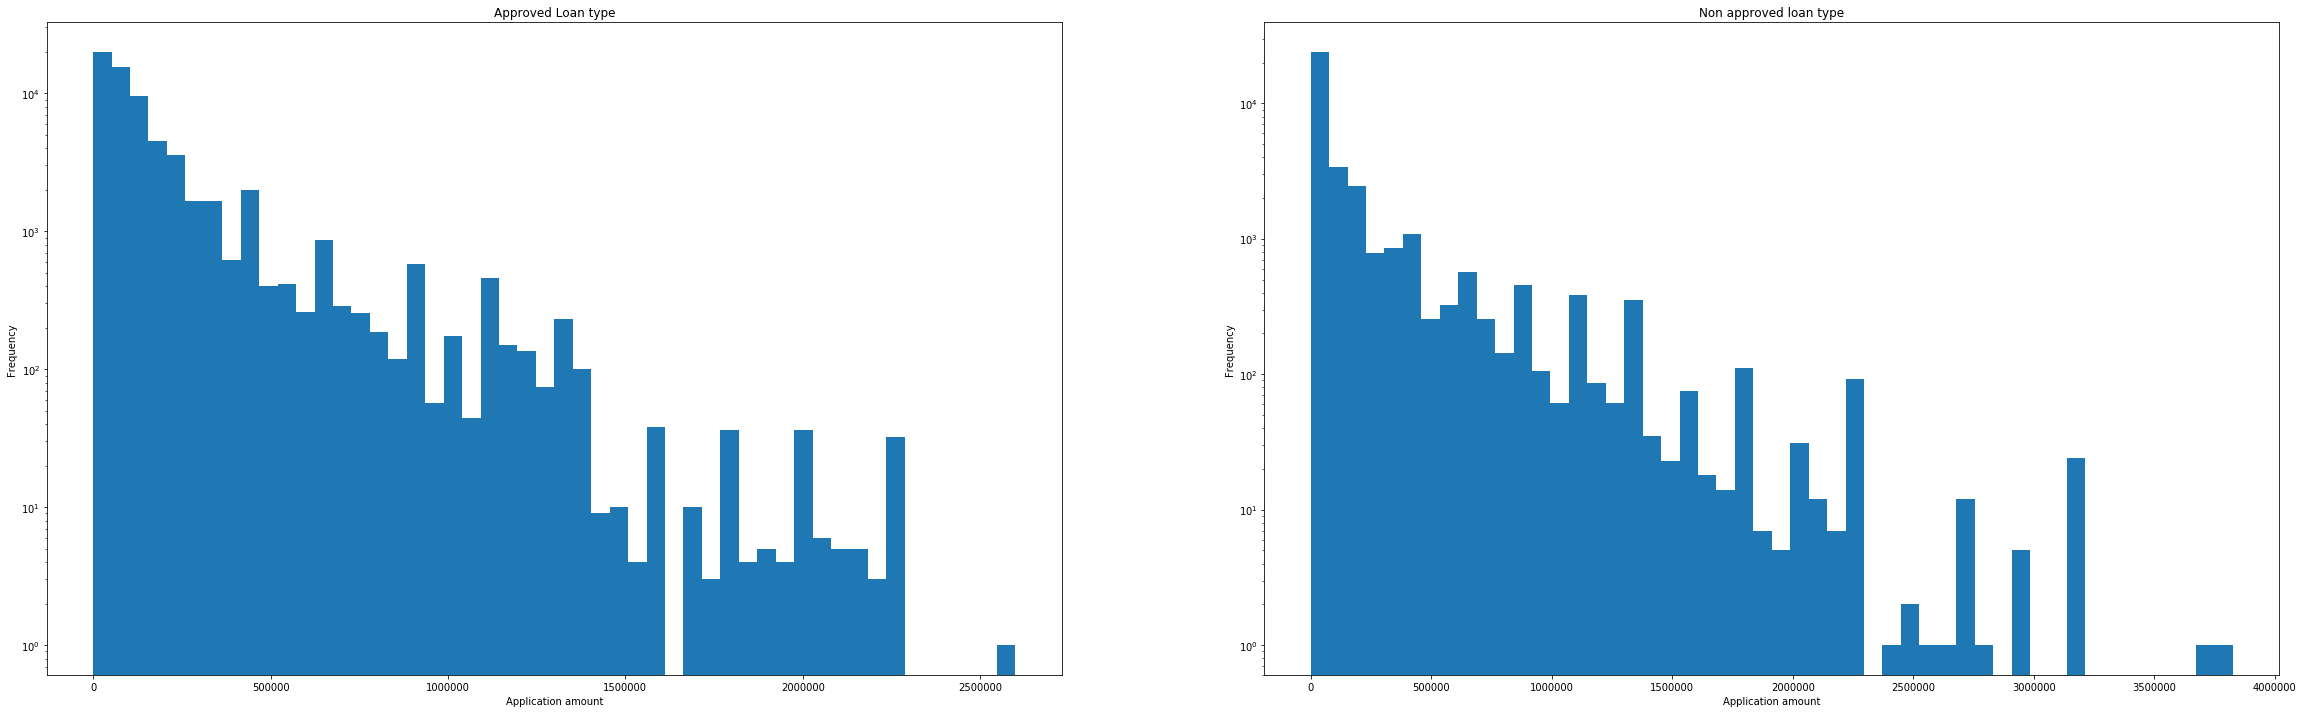

In [75]:
# AMT_APPLICATION analysis for Target variable.
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_numerical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].plot(ax=axes[axis], kind='hist', bins=50)
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    
plot_numerical(0, 'AMT_APPLICATION', df_1, 'Approved Loan type', 'Application amount', 'Frequency')
plot_numerical(1, 'AMT_APPLICATION', df_0, 'Non approved loan type', 'Application amount', 'Frequency')

### Bivariate analysis for Numerical variables.

Selected numerical variables for our analysis,

1. **AMT_APPLICATION** and **AMT_CREDIT**

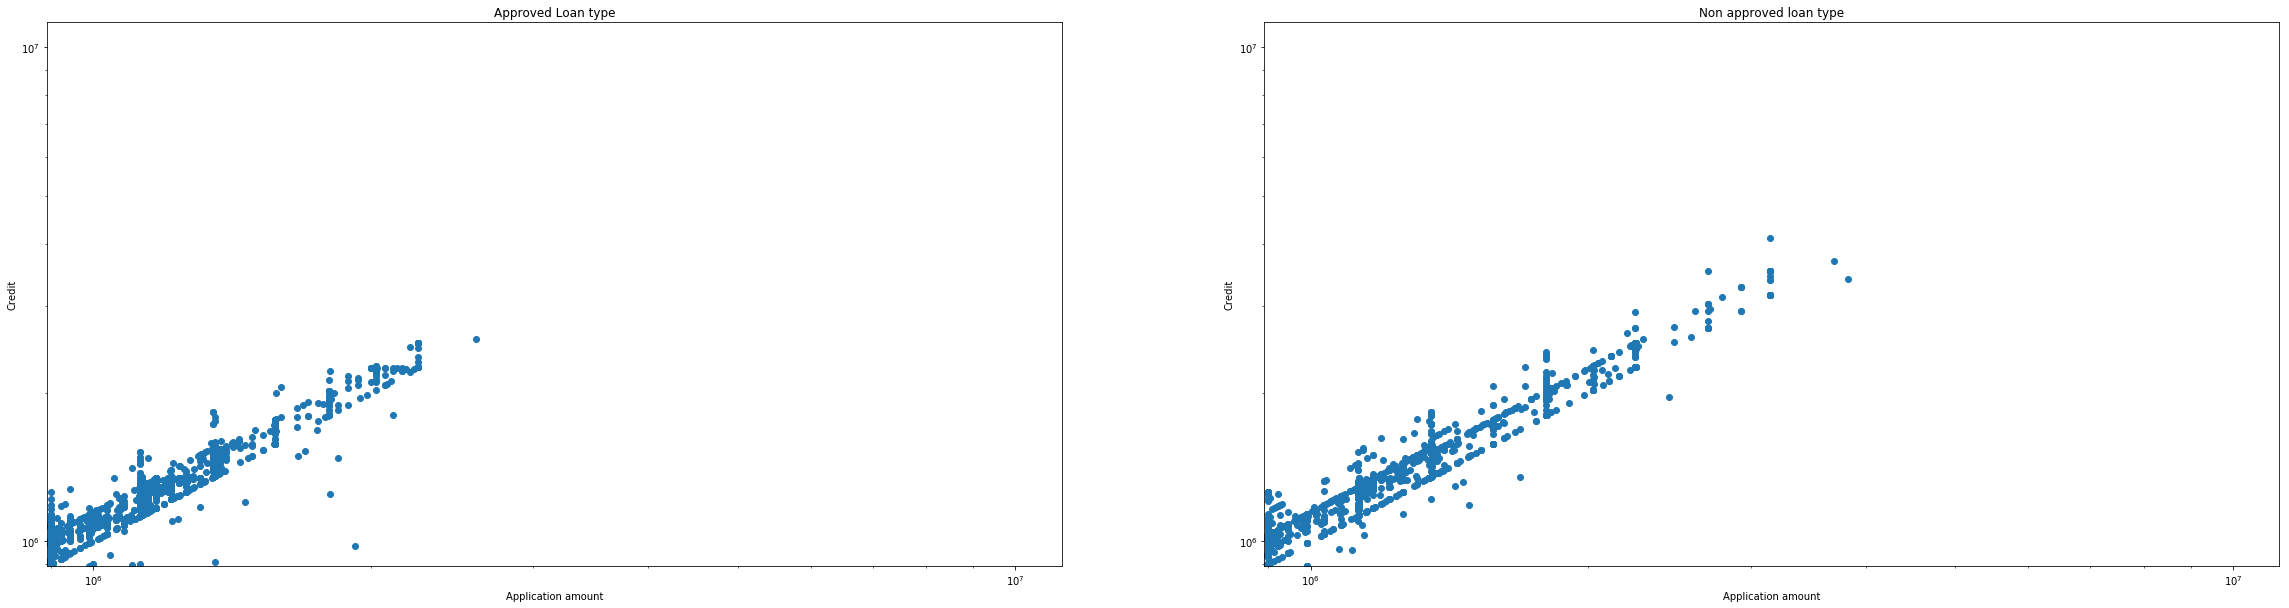

In [77]:
# Plot data.
fig, axes = plt.subplots(1,2,figsize=(40,10))

def plot_bivariate(axis, variable1, variable2, data_frame, title, x_label, y_label):
    axes[axis].scatter(data_frame[variable1], data_frame[variable2])
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_xscale('log')
    axes[axis].set_title(title)

plot_bivariate(0, 'AMT_APPLICATION', 'AMT_CREDIT', df_1, 'Approved Loan type', 'Application amount', 'Credit')
plot_bivariate(1, 'AMT_APPLICATION', 'AMT_CREDIT', df_0, 'Non approved loan type', 'Application amount', 'Credit')

### Inferences from above plot:

From the above plot we can observe the following,

1. There seems to be positive correlation between between variables(0.96 corelation) - Amount credit and Amount application.
2. So if credit the client asked on the previous application is more then final credit amount on the previous application has increased.


## Observations : final inferences from the analysis of 'previous_application.csv':


#### Select attributes(features - independant variables) for our analysis.

We can consider below attributes(independant variables) for our analysis on how these impact our 'TARGET' variable, Also at the end of this first set of analysis we will put our observations on how some of these variables impact the Loan contract status. This can be finally used to predict probable defaults.

TARGET variable - **NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application**

    1. NAME_CONTRACT_TYPE  - Contract product type (Cash loan, consumer loan [POS] ,...)
    2. AMT_CREDIT          - Final credit amount on the previous application.
    3. AMT_APPLICATION     - how much credit did client ask on the previous application.
    3. NAME_CLIENT_TYPE    - Was the client old or new client when applying for the previous application.
    4. NAME_PAYMENT_TYPE   - Payment method that client chose to pay for the previous application.
    5. NAME_YIELD_GROUP    - Grouped interest rate into small medium and high of the previous application
    6. AMT_ANNUITY         - Annuity of previous application


### Inferences for loan contract type:

It can observed from the above plots that for both the categories of our target variable 
**Cash loans** and **Consumer loans** tend to have higher contribution than **Revolving loans**.

Observation for **Approved loan types**

clients have more approved loans for cash loans and consumer loans compared to Revolving loan type.



### Inferences for payment type:

It can observed from the above plots that for both the categories of our target variable 
**Cash through the banks**, **XNA** and **Non-cash from your account** tend to have higher contribution than **Cashless from the account of the employer**.

Observation for **Approved loan types**

clients have more approved loans for **Cash through the banks**, **XNA** and **Non-cash from your account**.

Observation for **Non approved loan types**

clients have more **rejected/Cancelled** loans for **XNA** and **Non-cash from your account**.


### Inferences for Name yield group:

Observation for **Approved loan types**

clients have more percentage of approved loans for **Middle**, **High** and **low_normal**.

Observation for **Non approved loan types**

clients have more **rejected/Cancelled** loans for **XNA** and **low_normal**.


### Top 10 correlated variables:

    1.  AMT_APPLICATION  AMT_GOODS_PRICE    0.999862
    2.  AMT_CREDIT       AMT_GOODS_PRICE    0.993513
    3.  AMT_APPLICATION  AMT_CREDIT         0.976185
    4.  AMT_ANNUITY      AMT_GOODS_PRICE    0.821803
    5.  AMT_ANNUITY      AMT_CREDIT         0.815988
    6.  AMT_ANNUITY      AMT_APPLICATION    0.809942
    7.  AMT_GOODS_PRICE  CNT_PAYMENT        0.659484
    8.  AMT_APPLICATION  CNT_PAYMENT        0.639096
    9.  AMT_CREDIT       CNT_PAYMENT        0.633221
    10. AMT_ANNUITY      CNT_PAYMENT        0.383979


So from the above data we can see **AMT_APPLICATION** and **AMT_GOODS_PRICE** is highly correlated.
which is followed by **AMT_CREDIT** and **AMT_GOODS_PRICE** and so on as shown in above list.

## --------------- Final inferences on driving factors (or driver variables) behind loan default.

### We will produce our final inferences on all the analyszed variables which can be driver factors for a probable loan default.

#### Infernces from Data set 1 - **application_data.csv**

1. Clients with **Cash loans** contract type has very less chance of being loan default.
2. On the other hand clients with **Revolving loans** has more likely to become default relatively.
3. clients are more likely to not become loan default for education categories such as **Secondary and Higher education.**
4. clients are more likely to not to become defaulter for very high, high and medium income slabs
5. On the other hand clients with low income slabs have higher probability of becoming a loan default.

Inferences from Bivariate analysis - Amount Credit and Amount Income in Total:

1. There seems to be positive correlation between between variables - Income total and Amount credit.
2. So if Total income increases then there is possible chance to increase the credit amount of the loan 

thus probability of client becoming loan defaulter with lesser income is very high - so we can consider clients with low income as probable defaults.


#### Infernces from Data set 2 - **previous_application.csv**

1. Clients with **Cash loans** and **Consumer loans** contract type has very less chance of being loan default.
2. On the other hand clients with **Revolving loans** has more likely to become default relatively.
3. Clients have less probability of turning to defaulter for payment types - Cash through the banks and XNA.
4. Clients with payment type Non-cash from your account has more chances of being defaulter.
5. clients have more percentage of approved loans for Middle, High and low_normal, which indicates less proabaility of being default.
6. **AMT_APPLICATION** and **AMT_GOODS_PRICE** is highly correlated which indicates increase in one for increase in other.